In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor


import matplotlib.pyplot as plt
print(torch.__version__)
print(torchvision.__version__)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

2.6.0+cu124
0.21.0+cu124
Using cpu device


In [ ]:
from torchvision import datasets

train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [ ]:
print (f"image shape: {image.shape}")
print (f"image label: {class_names[label]}")

image shape: torch.Size([1, 28, 28])
image label: Ankle boot


image shape: torch.Size([1, 28, 28])


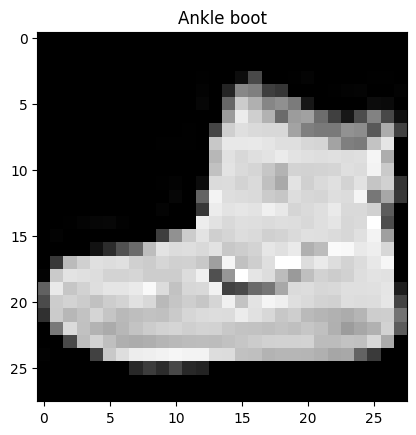

In [ ]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print (f"image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap="grey")
plt.title(class_names[label])
plt.show()

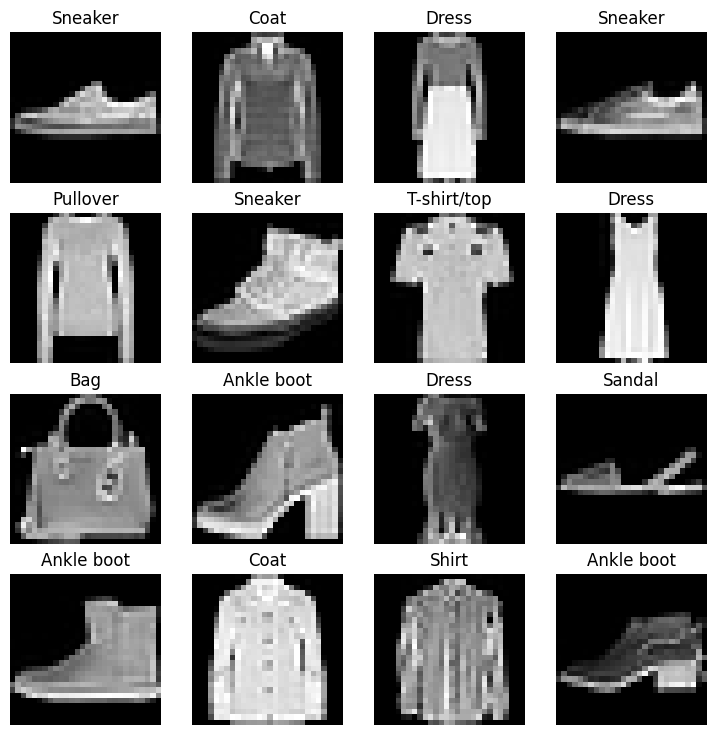

In [ ]:
#torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    pimg, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(pimg.squeeze(), cmap="grey")
    plt.title(class_names[label])
    plt.axis(False)

In [ ]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7a29cb55eb90>,
 <torch.utils.data.dataloader.DataLoader at 0x7a29c98fb350>)

In [ ]:
print(f"train_dataloader: {train_dataloader}")
print(f"test_dataloader: {test_dataloader}")

train_dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7a29cb55eb90>
test_dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7a29c98fb350>


In [ ]:
print(f"len(train_dataloader): {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"len(test_dataloader): {len(test_dataloader)} batches of {BATCH_SIZE}...")

len(train_dataloader): 1875 batches of 32...
len(test_dataloader): 313 batches of 32...


In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image shape: torch.Size([1, 28, 28])
image label: 4, label size: torch.Size([])


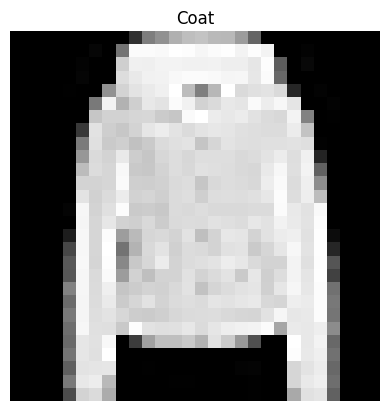

In [ ]:
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="grey")
plt.title(class_names[label])
plt.axis(False)
print (f"image shape: {img.shape}")
print(f"image label: {label}, label size: {label.shape}")

In [ ]:
flatten_model = nn.Flatten()
x = train_features_batch[0]
output = flatten_model(x)

print(f"shape before flatten: {x.shape} -> [color_channels, heights.weight]")
print(f"shape after flatten: {output.shape} -> [color_channels, heights.weight]")

shape before flatten: torch.Size([1, 28, 28]) -> [color_channels, heights.weight]
shape after flatten: torch.Size([1, 784]) -> [color_channels, heights.weight]


In [ ]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000, 0.1059,
        0.5529, 0.3804, 0.2078, 0.2353, 0.2588, 0.2431, 0.2627, 0.1725, 0.3020,
        0.3882, 0.0471, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.2431, 0.5098,
        0.5608, 0.6745, 0.6824, 0.5176, 0.5020, 0.5961, 0.5647, 0.5176, 0.4745,
        0.6078, 0.5961, 0.5098, 0.4314, 0.2627, 0.0118, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.2941, 0.5961,
        0.5373, 0.5176, 0.4941, 0.5647, 0.6471, 0.5725, 0.5098, 0.4941, 0.5216,
        0.5961, 0.5098, 0.4588, 0.4784, 0.5216, 0.5373, 0.3137, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5373,
        0.5882, 0.5294, 0.4784, 0.4941, 0.5098, 0.4941, 0.5647, 0.6039, 0.5961,
        0.5529, 0.4863, 0.4314, 0.4353, 0.4510, 0.4588, 0.5098, 0.5451, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
             input_shape: int,
             hidden_units: int,
             output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                 out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                 out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=28,
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")

model_0


FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=28, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(
    input_shape=28*28, # this is the output of the flatten layer
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print ("helper_functions.py already exits, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exits, skipping download...


In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [ ]:
test_loss, test_acc = 0, 0
for x_test, y_test in test_dataloader:
    test_pred = model_0(x_test)
    test_loss += loss_fn(test_pred, y_test).item()

    test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

In [ ]:
from timeit import default_timer as timer
def print_train_time (start: float,
                      end: float,
                      device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
start_time = timer()
end_time = timer()
print_train_time(start=start_time, end=end_time, device=None)

Train time on None: 0.000 seconds


3.2201999601966236e-05

In [ ]:
from tqdm.auto import tqdm
from timeit import default_timer as timer
import torch

torch.manual_seed(42)

train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_loss = 0

  for batch, (x, y) in enumerate(train_dataloader):  # changed X → x
    model_0.train()

    y_pred = model_0(x)  # changed x to lowercase x to match line above

    loss = loss_fn(y_pred, y)
    train_loss += loss.item()  # .item() to accumulate scalar, not tensor

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(x)}/{len(train_dataloader.dataset)} samples")

train_loss /= len(train_dataloader)

test_loss, test_acc = 0, 0
model_0.eval()
with torch.inference_mode():
  for x_test, y_test in test_dataloader:
    test_pred = model_0(x_test)
    test_loss += loss_fn(test_pred, y_test).item()  # add .item()

    test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

test_loss /= len(test_dataloader)
test_acc /= len(test_dataloader)

print(f"Train loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.4532 | Test loss: 0.5109, Test acc: 82.3782
Train time on cpu: 38.744 seconds


In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5108762979507446,
 'model_acc': 82.37819488817891}

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
torch.cuda.is_available()

False

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1( input_shape=784,
                               hidden_units=10,
                               output_shape=len(class_names)
).to(device)

next(model_1.parameters()).device

device(type='cpu')

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    """Performs a training step on a single batch of data."""
    train_loss, train_acc = 0, 0
    model.train()
    for batch, (x, y) in enumerate(data_loader):
        x, y = x.to(device), y.to(device)
        # 1. Forward pass
        y_pred = model(x)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and acc per epoch
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    """Performs a testing loop step on model going over data_loader."""
    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for x, y in data_loader:
            # Send data to device
            x, y = x.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(x)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1)) # go from logits -> prediction labels

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [ ]:
import torch
from timeit import default_timer as timer
from tqdm.auto import tqdm  # for the progress bar

# Set random seed
torch.manual_seed(42)

# Start timer
train_time_start_on_gpu = timer()

# Set number of epochs
epochs = 3

# Training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(
        model=model_1,
        data_loader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )

    test_step(
        model=model_1,
        data_loader=test_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

# End timer
train_time_end_on_gpu = timer()

# Print total training time
total_train_time_model_1 = print_train_time(
    start=train_time_start_on_gpu,
    end=train_time_end_on_gpu,
    device=device
)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.64607 | Train accuracy: 77.17%
Test loss: 0.53855 | Test accuracy: 80.76%

Epoch: 1
---------
Train loss: 0.48094 | Train accuracy: 82.94%
Test loss: 0.49390 | Test accuracy: 82.46%

Epoch: 2
---------
Train loss: 0.44689 | Train accuracy: 84.16%
Test loss: 0.45746 | Test accuracy: 83.99%

Train time on cpu: 37.661 seconds


In [ ]:
def eval_model(model, data_loader, loss_fn, accuracy_fn, device):
    """Returns a dictionary containing the results of model evaluation on test data."""
    model.eval()
    loss, acc = 0, 0

    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)

            y_pred = model(X)

            loss += loss_fn(y_pred, y).item()
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))  # .argmax gets class predictions

    loss /= len(data_loader)
    acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss,
            "model_acc": acc}


In [ ]:
model_1_results = eval_model(model=model_1,
                       data_loader=test_dataloader,
                      loss_fn=loss_fn,
                      accuracy_fn=accuracy_fn,
                      device=device)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.4574634914104931,
 'model_acc': 83.98562300319489}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5108762979507446,
 'model_acc': 82.37819488817891}

In [ ]:
class FashionMNISTV2(nn.Module):
  """Model architecture that replicates the tinnyvgg model from cnn explainer web"""
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
    nn.conv2d(in_channels=input_shape,
              out_channels=hidden_units,
              kernel_size=3,
              stride=1,
              padding=1),
    nn.ReLU(),
    nn.Conv2d(in_channels=hidden_units,
              put_channels=hidden_units,
              kernel_size=3,
              strike=1,
              padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2))
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)

      )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape))
  def forward(self, x):
        x = self.conv_block_1(x)
        print(x.shape)
        x = self.conv_block_2(x)
        print(x.shape)
        x = self.classifier(x)
        print(x.shape)
        return x

In [ ]:
import torch.nn as nn

class FashionMNISTV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_units * 7 * 7, output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x


In [ ]:
model_2 = FashionMNISTV2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)


In [ ]:
torch.manual_seed(42)
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]
print(f"image batch shaper: {images.shape}")
print(f"image shape: {test_image.shape}")
print(f"test image:\n {test_image}")

image batch shaper: torch.Size([32, 3, 64, 64])
image shape: torch.Size([3, 64, 64])
test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,

In [ ]:
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=0)
conv_output = conv_layer(test_image.unsqueeze(dim=0))
print(f"conv output shape: {conv_output.shape}")
conv_output

conv output shape: torch.Size([1, 10, 62, 62])


tensor([[[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
          [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
          [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
          ...,
          [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
          [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
          [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

         [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
          [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
          [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
          ...,
          [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
          [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
          [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

         [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
          [ 0.8117,  0.3191, -

In [ ]:
print(f"test image original shape: {test_image.shape}")
print(f"test image unsqueezed shape: {test_image.unsqueeze(dim=0).shape}")

max_pool_layer = nn.MaxPool2d(kernel_size=2)
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"shape after going through conv layer: {test_image_through_conv.shape}")
test_image_output = max_pool_layer(test_image_through_conv)
print(f"shape after going through max pool layer: {test_image_output.shape}")

test image original shape: torch.Size([3, 64, 64])
test image unsqueezed shape: torch.Size([1, 3, 64, 64])
shape after going through conv layer: torch.Size([1, 10, 62, 62])
shape after going through max pool layer: torch.Size([1, 10, 31, 31])


In [ ]:
torch.manual_seed(42)
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"random tensor: {random_tensor}")
print(f"random tensor shape: {random_tensor.shape}")
max_pool_layer = nn.MaxPool2d(kernel_size=2)
max_pool_tesor=max_pool_layer(random_tensor)
print(f"random tensor: {random_tensor}")
print(f"random tensor shape: {random_tensor.shape}")


random tensor: tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
random tensor shape: torch.Size([1, 1, 2, 2])
random tensor: tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
random tensor shape: torch.Size([1, 1, 2, 2])


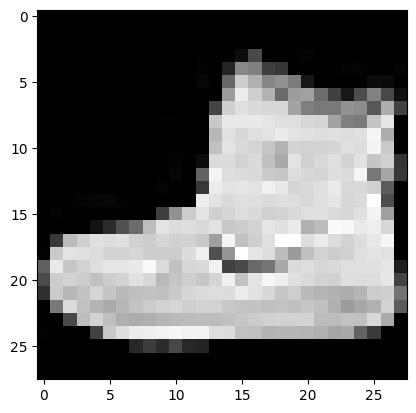

In [ ]:
plt.imshow(image.squeeze(), cmap="grey")

In [ ]:
rand_image_tensor = torch.rand(size=(1, 1, 28,28))
rand_image_tensor.shape

torch.Size([1, 1, 28, 28])

In [ ]:
model_2(rand_image_tensor.to(device))

tensor([[-0.0040,  0.0434, -0.0949,  0.1359,  0.0569, -0.0788, -0.0330,  0.0797,
          0.1268,  0.0513]], grad_fn=<AddmmBackward0>)

In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[-0.1536, -0.0391, -0.1354],
                        [ 0.2211, -0.2631, -0.1537],
                        [-0.0941, -0.2004,  0.0315]]],
              
              
                      [[[-0.3292,  0.3010, -0.2832],
                        [ 0.2573,  0.0555, -0.1082],
                        [ 0.2060,  0.0520,  0.2693]]],
              
              
                      [[[ 0.0364, -0.1051,  0.0896],
                        [-0.0904,  0.1403,  0.2976],
                        [ 0.1927, -0.1457,  0.1924]]],
              
              
                      [[[ 0.0596,  0.1693, -0.2032],
                        [-0.3300, -0.1288, -0.2557],
                        [ 0.2735,  0.0960,  0.1381]]],
              
              
                      [[[ 0.1054, -0.0058,  0.2609],
                        [-0.2368,  0.0210, -0.2275],
                        [ 0.1028, -0.1148,  0.1021]]],
              
              
      

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(
        model=model_2,
        data_loader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(
        model=model_2,
        data_loader=test_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

# These lines should NOT be indented inside the loop
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(
    start=train_time_start_model_2,
    end=train_time_end_model_2,
    device=device
)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.56090 | Train accuracy: 80.02%
Test loss: 0.39554 | Test accuracy: 85.93%

Epoch: 1
---------
Train loss: 0.36712 | Train accuracy: 86.92%
Test loss: 0.36268 | Test accuracy: 87.11%

Epoch: 2
---------
Train loss: 0.33418 | Train accuracy: 88.02%
Test loss: 0.35946 | Test accuracy: 87.38%

Train time on cpu: 95.268 seconds


In [ ]:
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_2_results

{'model_name': 'FashionMNISTV2',
 'model_loss': 0.35945739066258026,
 'model_acc': 87.38019169329074}

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.510876,82.378195
1,FashionMNISTModelV1,0.457463,83.985623
2,FashionMNISTV2,0.359457,87.380192


In [ ]:
compare_results["training_time"] = [total_train_time_model_0,total_train_time_model_1,total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.510876,82.378195,38.743620
1,FashionMNISTModelV1,0.457463,83.985623,37.661180
2,FashionMNISTV2,0.359457,87.380192,95.268046


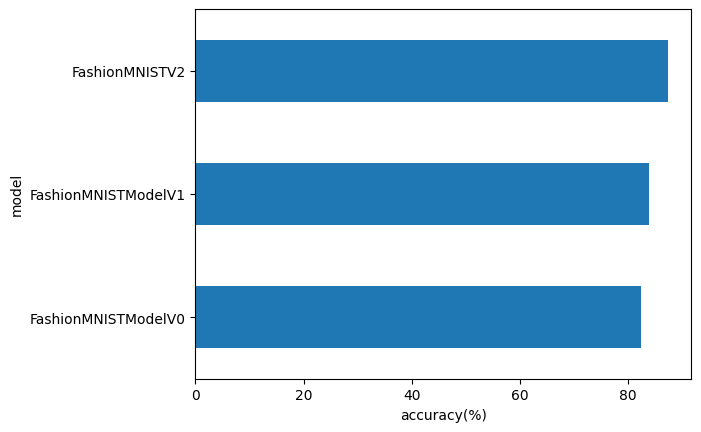

In [ ]:
compare_results.set_index( "model_name") ["model_acc"].plot ( kind="barh" )
plt.xlabel("accuracy(%)")
plt.ylabel("model");

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []  # initialize the list
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)  # add batch dimension
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            pred_probs.append(pred_prob.cpu())  # move to CPU before storing

    return torch.stack(pred_probs)  # stack list of tensors into one tensor


In [ ]:
import random
#random.seed(42)
test_samples = []
test_label = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_label.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Pullover')

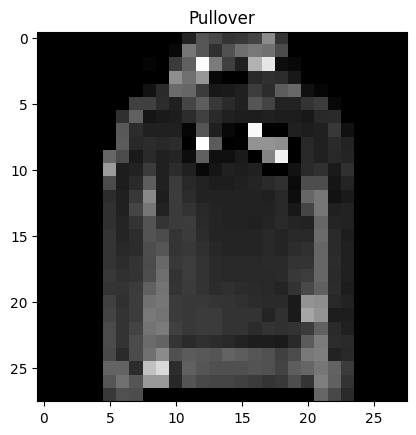

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_label[0]])

In [ ]:
pred_probs = make_predictions(model=model_2,data=test_samples)
pred_probs[:2]

tensor([[4.8722e-02, 2.4335e-04, 7.9980e-01, 1.2243e-02, 1.1336e-01, 1.1283e-05,
         1.9036e-02, 8.4016e-05, 6.4443e-03, 4.9048e-05],
        [8.3753e-04, 1.6646e-04, 9.2224e-02, 9.4887e-04, 8.8666e-01, 1.1367e-07,
         1.5262e-02, 4.6639e-07, 3.9019e-03, 1.7382e-07]])

In [ ]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 4, 6, 3, 2, 2, 0, 1, 1])

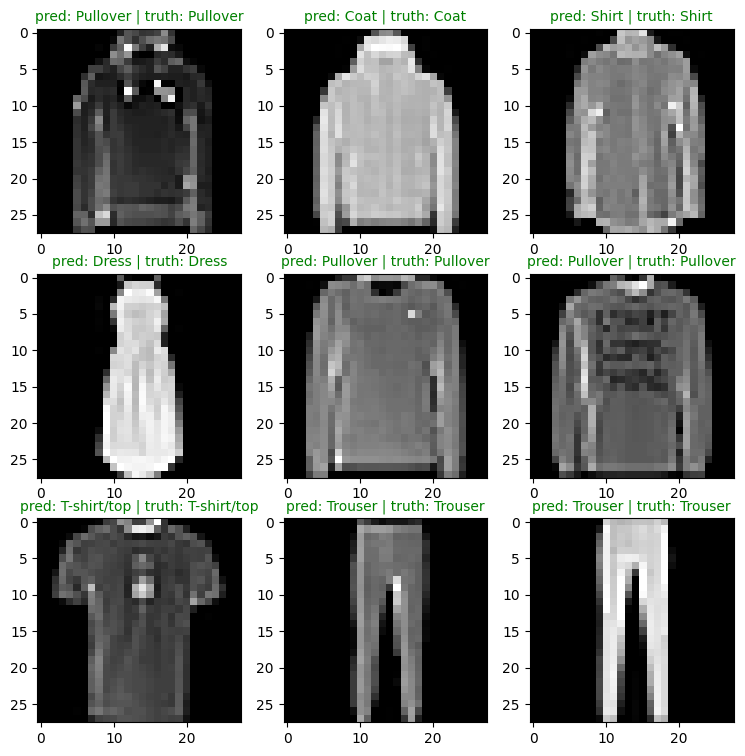

In [ ]:
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(sample.squeeze(), cmap="gray")
    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_label[i]]
    title_text = f"pred: {pred_label} | truth: {truth_label}"
    if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g")
    else:
      plt.title(title_text, fontsize=10, c="r")

      plt.axis(False);

In [ ]:
from tqdm.auto import tqdm
y_preds_list = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making prediction..."):
        X, y = X.to(device), y.to(device)
        y_logits = model_2(X)
        y_pred = torch.softmax(y_logits.squeeze(), dim=1).argmax(dim=1)
        y_preds_list.append(y_pred.cpu())

    y_pred_tensor = torch.cat(y_preds_list)
    y_pred_tensor[:10]

Making prediction...:   0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
len(y_pred_tensor), len(test_data)

(10000, 10000)

In [ ]:
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19
except (ImportError, AssertionError):
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.9/981.9 kB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.5 MB/s eta 0:00:00
mlxtend version: 0.23.4


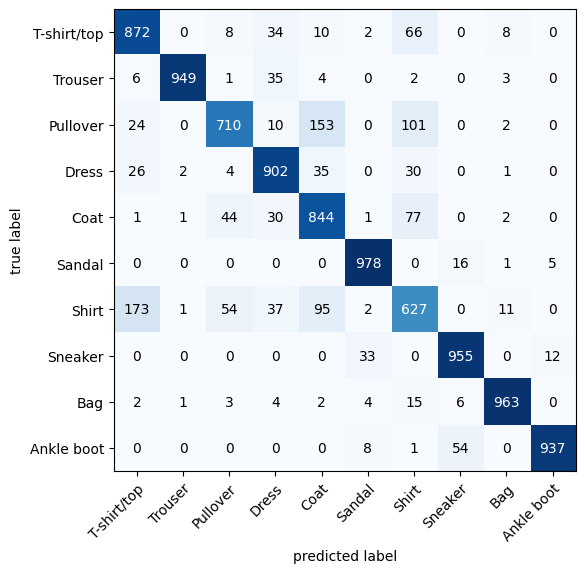

In [ ]:
from torchmetrics.classification import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import torch

# Step 1: Define the confusion matrix metric
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")

# Step 2: Get confusion matrix as a tensor
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)

# Step 3: Convert to NumPy for plotting
confmat_numpy = confmat_tensor.numpy()

# Step 4: Plot using mlxtend
fig, ax = plot_confusion_matrix(conf_mat=confmat_numpy, class_names=class_names, figsize=(8, 6))
plt.show()

In [ ]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "Pytorch_CV_workflow_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print (f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)



Saving model to: models/Pytorch_CV_workflow_model_2.pth


In [ ]:
torch.manual_seed(42)
loaded_model_2 = FashionMNISTV2(input_shape=1,hidden_units=10,output_shape=len(class_names))
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2.to(device)

FashionMNISTV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'model_name': 'FashionMNISTV2',
 'model_loss': 0.35945739066258026,
 'model_acc': 87.38019169329074}

In [ ]:
torch.manual_seed(42)
loaded_model_2_results = eval_model(model=loaded_model_2,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn,
                                    device=device)
loaded_model_2_results

{'model_name': 'FashionMNISTV2',
 'model_loss': 0.35945739066258026,
 'model_acc': 87.38019169329074}

In [ ]:
torch.isclose(torch.tensor(model_2_results["model_loss"]), torch.tensor(loaded_model_2_results["model_loss"]), atol=1e-02)

tensor(True)